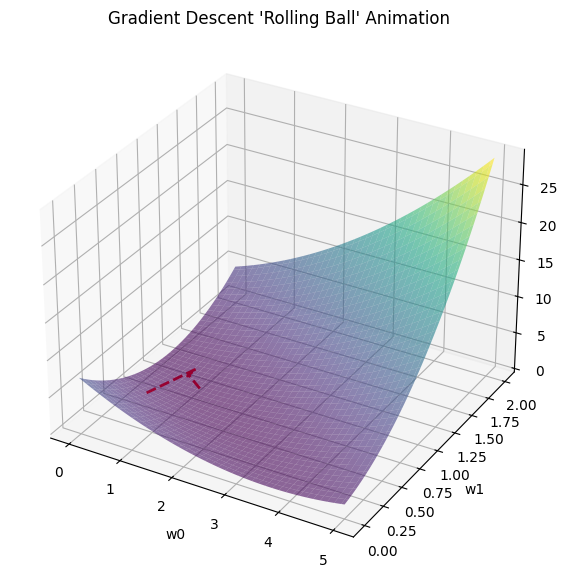

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, FloatSlider

# Sample data
X = np.array([1, 2, 3, 4, 5])
y = np.array([2.2, 2.8, 4.5, 3.7, 5.0])
m = len(X)

# Cost function and gradients
def compute_cost(w0, w1):
    y_pred = w0 + w1 * X
    return np.mean((y - y_pred)**2) / 2

def gradients(w0, w1):
    y_pred = w0 + w1 * X
    dw0 = -np.mean(y - y_pred)
    dw1 = -np.mean((y - y_pred) * X)
    return dw0, dw1

def init():
    ball.set_data([], [])
    ball.set_3d_properties([])
    return ball,

def update(frame):
    ball.set_data(path[frame,0], path[frame,1])
    ball.set_3d_properties(path[frame,2])
    return ball,

def draw():
    # Surface grid
    w0_vals = np.linspace(0, 5, 80)
    w1_vals = np.linspace(0, 2, 80)
    W0, W1 = np.meshgrid(w0_vals, w1_vals)
    J = np.zeros_like(W0)

    for i in range(W0.shape[0]):
        for j in range(W0.shape[1]):
            J[i,j] = compute_cost(W0[i,j], W1[i,j])

    # Gradient descent
    w0, w1 = 0.5, 0.5
    alpha = 0.1
    path = [(w0, w1, compute_cost(w0, w1))]

    for i in range(30):
        dw0, dw1 = gradients(w0, w1)
        w0 -= alpha * dw0
        w1 -= alpha * dw1
        path.append((w0, w1, compute_cost(w0, w1)))

    path = np.array(path)

    # 3D animation
    fig = plt.figure(figsize=(9,7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(W0, W1, J, cmap='viridis', alpha=0.6)
    ax.set_xlabel('w0'); ax.set_ylabel('w1'); ax.set_zlabel('Cost J')
    ax.set_title("Gradient Descent 'Rolling Ball' Animation")

    # Plot path line
    ax.plot(path[:,0], path[:,1], path[:,2], 'r--', lw=2)
    ball, = ax.plot([], [], [], 'ro', markersize=8)


    ani = FuncAnimation(fig, update, frames=len(path), init_func=init, blit=True, interval=4)
    plt.show()

draw()
# interact(draw,
#          w0=FloatSlider(min=0, max=5, step=0.1, value=1.0),
#          w1=FloatSlider(min=-1, max=2, step=0.1, value=0.5))
